In [33]:
import fastf1
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting as f1_plt
import pandas as pd
import utils as ut

In [34]:
# gettting the data
session = ut.get_session()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [35]:
q1, q2, q3 = ut.get_qualifying(session)
fast_mag = q3.pick_driver('MAG')
fast_ver = q3.pick_driver('VER')

In [36]:
print(fast_mag.pick_lap(25)["Sector1Time"])
print(fast_mag.pick_lap(25)["Sector2Time"])
print(fast_mag.pick_lap(25)["Sector3Time"])

24   0 days 00:00:18.410000
Name: Sector1Time, dtype: timedelta64[ns]
24   0 days 00:00:36.290000
Name: Sector2Time, dtype: timedelta64[ns]
24   0 days 00:00:16.974000
Name: Sector3Time, dtype: timedelta64[ns]


In [37]:
print(fast_ver.pick_lap(22)["Sector1Time"])
print(fast_ver.pick_lap(22)["Sector2Time"])
print(fast_ver.pick_lap(22)["Sector3Time"])

47   0 days 00:00:18.331000
Name: Sector1Time, dtype: timedelta64[ns]
47   0 days 00:00:36.607000
Name: Sector2Time, dtype: timedelta64[ns]
47   0 days 00:00:16.939000
Name: Sector3Time, dtype: timedelta64[ns]


In [86]:
best_lap_mag = fast_mag.pick_lap(25).get_car_data()
best_lap_mag_pos = fast_mag.pick_lap(25).get_pos_data(pad=1, pad_side='both')
best_lap_tel_mag = fast_mag.pick_lap(25).get_telemetry()

best_lap_ver = fast_ver.pick_lap(22).get_car_data()
best_lap_ver_pos = fast_ver.pick_lap(22).get_pos_data(pad=1, pad_side='both')
best_lap_tel_ver = fast_ver.pick_lap(22).get_telemetry()

In [107]:
ani_lap_mag_pos = best_lap_mag_pos.merge_channels(best_lap_tel_mag)
ani_lap_mag_pos = ani_lap_mag_pos.where(ani_lap_mag_pos["Source"] != 'car')
ani_lap_mag_pos = ani_lap_mag_pos[ani_lap_mag_pos['Time'].notna()].reset_index(drop=True)
ani_lap_mag_pos

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2022-11-11 19:49:19.909,0 days 01:03:15.119000,,NaN,0 days 00:00:00,11327.0,318.0,8.0,99.0,False,12.0,pos,-8.214402,-1.902843e-03,OnTrack,-4196.0,-2087.0,7766.0
1,2022-11-11 19:49:20.002,0 days 01:03:15.212000,,NaN,0 days 00:00:00.093000,11327.0,318.0,8.0,99.0,False,12.0,interpolation,0.000177,4.091379e-08,OnTrack,-4175.0,-2166.0,7767.0
2,2022-11-11 19:49:20.169,0 days 01:03:15.379000,,NaN,0 days 00:00:00.260000,11349.0,318.0,8.0,99.0,False,12.0,pos,14.745375,3.415724e-03,OnTrack,-4139.0,-2310.0,7772.0
3,2022-11-11 19:49:20.389,0 days 01:03:15.599000,,NaN,0 days 00:00:00.480000,11361.0,318.0,8.0,99.0,False,12.0,pos,34.181747,7.918105e-03,OnTrack,-4091.0,-2498.0,7777.0
4,2022-11-11 19:49:20.609,0 days 01:03:15.819000,,NaN,0 days 00:00:00.700000,11371.0,318.0,8.0,99.0,False,12.0,pos,53.673078,1.243322e-02,OnTrack,-4047.0,-2670.0,7785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-11-11 19:50:30.969,0 days 01:04:26.179000,,NaN,0 days 00:01:11.060000,11355.0,319.0,8.0,99.0,False,12.0,pos,4182.955736,9.689699e-01,OnTrack,-4315.0,-1609.0,7752.0
269,2022-11-11 19:50:31.308,0 days 01:04:26.518000,,NaN,0 days 00:01:11.399000,11320.0,319.0,8.0,99.0,False,12.0,pos,4213.086499,9.759496e-01,OnTrack,-4264.0,-1815.0,7756.0
270,2022-11-11 19:50:31.508,0 days 01:04:26.718000,,NaN,0 days 00:01:11.599000,11286.0,318.0,8.0,99.0,False,12.0,pos,4230.801558,9.800532e-01,OnTrack,-4220.0,-1993.0,7763.0
271,2022-11-11 19:50:31.676,0 days 01:04:26.886000,,NaN,0 days 00:01:11.767000,11269.0,317.0,8.0,99.0,False,12.0,interpolation,4245.631113,9.834884e-01,OnTrack,-4182.0,-2139.0,7766.0


In [108]:
ani_lap_ver_pos = best_lap_ver_pos.merge_channels(best_lap_tel_ver)
ani_lap_ver_pos = ani_lap_ver_pos.where(ani_lap_ver_pos["Time"] <= ani_lap_mag_pos["Time"].max()).where(ani_lap_ver_pos["Source"] != 'car')
ani_lap_ver_pos = ani_lap_ver_pos[ani_lap_ver_pos['Time'].notna()].reset_index(drop=True)
ani_lap_ver_pos

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2022-11-11 19:49:37.069,0 days 01:03:32.279000,,383.686111,0 days 00:00:00,11441.0,324.0,8.0,100.0,False,12.0,pos,-14.011310,-3.296151e-03,OnTrack,-4209.0,-2037.0,7764.0
1,2022-11-11 19:49:37.225,0 days 01:03:32.435000,,383.686111,0 days 00:00:00.156000,11441.0,324.0,8.0,100.0,False,12.0,interpolation,-0.001650,-3.881358e-07,OnTrack,-4155.0,-2243.0,7769.0
2,2022-11-11 19:49:37.429,0 days 01:03:32.639000,,383.686111,0 days 00:00:00.360000,11517.0,324.0,8.0,100.0,False,12.0,pos,18.362488,4.319762e-03,OnTrack,-4107.0,-2438.0,7776.0
3,2022-11-11 19:49:37.789,0 days 01:03:32.999000,55,379.752778,0 days 00:00:00.720000,11547.0,325.0,8.0,100.0,False,12.0,pos,50.903871,1.197510e-02,OnTrack,-4058.0,-2631.0,7783.0
4,2022-11-11 19:49:38.109,0 days 01:03:33.319000,55,361.752778,0 days 00:00:01.040000,11511.0,326.0,8.0,100.0,False,12.0,pos,79.907027,1.879807e-02,OnTrack,-3977.0,-2937.0,7792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-11-11 19:50:47.549,0 days 01:04:42.759000,55,497.696944,0 days 00:01:10.480000,11360.0,319.0,8.0,100.0,False,12.0,pos,4090.789008,9.623552e-01,OnTrack,-4504.0,-750.0,7743.0
271,2022-11-11 19:50:47.809,0 days 01:04:43.019000,55,481.424722,0 days 00:01:10.740000,11372.0,320.0,8.0,100.0,False,12.0,pos,4113.930947,9.677993e-01,OnTrack,-4448.0,-1029.0,7743.0
272,2022-11-11 19:50:48.249,0 days 01:04:43.459000,55,456.546944,0 days 00:01:11.180000,11440.0,322.0,8.0,100.0,False,12.0,pos,4153.252648,9.770497e-01,OnTrack,-4374.0,-1361.0,7747.0
273,2022-11-11 19:50:48.469,0 days 01:04:43.679000,55,449.580278,0 days 00:01:11.400000,11461.0,322.0,8.0,100.0,False,12.0,pos,4172.994220,9.816939e-01,OnTrack,-4319.0,-1592.0,7752.0


In [105]:
# time diff
# from datetime import datetime

# gaps = []

# for i in range(len(best_lap_mag_pos)):
#     time1 = ani_lap_mag_pos["Time"][i]
#     time2 = ani_lap_ver_pos["Time"][i]

#     gap = time1 - time2
#     # gap_sec = gap.strftime("%H:%M:%S")

#     gaps.append(gap.total_seconds())

In [112]:
# dist diff
gaps = []
for i in range(len(ani_lap_mag_pos)):
    dist1 = ani_lap_mag_pos["Distance"][i]
    dist2 = ani_lap_ver_pos["Distance"][i]

    gap = dist1 - dist2
    gaps.append(gap)

In [114]:
gaps

[5.796908383242139,
 0.0018265127403616077,
 -3.6171133486582008,
 -16.722123799338014,
 -26.233949503534355,
 -48.22742557161342,
 -70.37900237349243,
 -52.88585063204195,
 -31.86046861486463,
 -35.2213386693804,
 -33.27713023838004,
 -12.250593736367307,
 -27.629682292363327,
 -27.11321791322439,
 -23.441016052262228,
 -18.216007131197046,
 -28.56802476254103,
 -30.81440318319818,
 -28.372403549274736,
 -32.58577933695989,
 -34.822553982069905,
 -35.01553455091954,
 -42.56532377289227,
 -41.766728968861514,
 -38.95742101828165,
 -40.96280907946738,
 -47.70226081292873,
 -40.72295459815393,
 -36.842604094332216,
 -33.563900526301836,
 -34.637725732470756,
 -37.04631359542384,
 -43.983166400819925,
 -47.333733708545935,
 -40.154314913462656,
 -44.38763308673316,
 -49.193518032245436,
 -49.475485382741795,
 -41.396841867021976,
 -42.05128014297645,
 -37.57139467530055,
 -37.238702368810436,
 -30.379219533543505,
 -41.456848962043864,
 -46.18578053875581,
 -43.90201629542889,
 -54.709880

In [115]:
mag_gaps = [0 if gap > 0 else -gap for gap in gaps]
ver_gaps = [0 if gap < 0 else gap for gap in gaps]


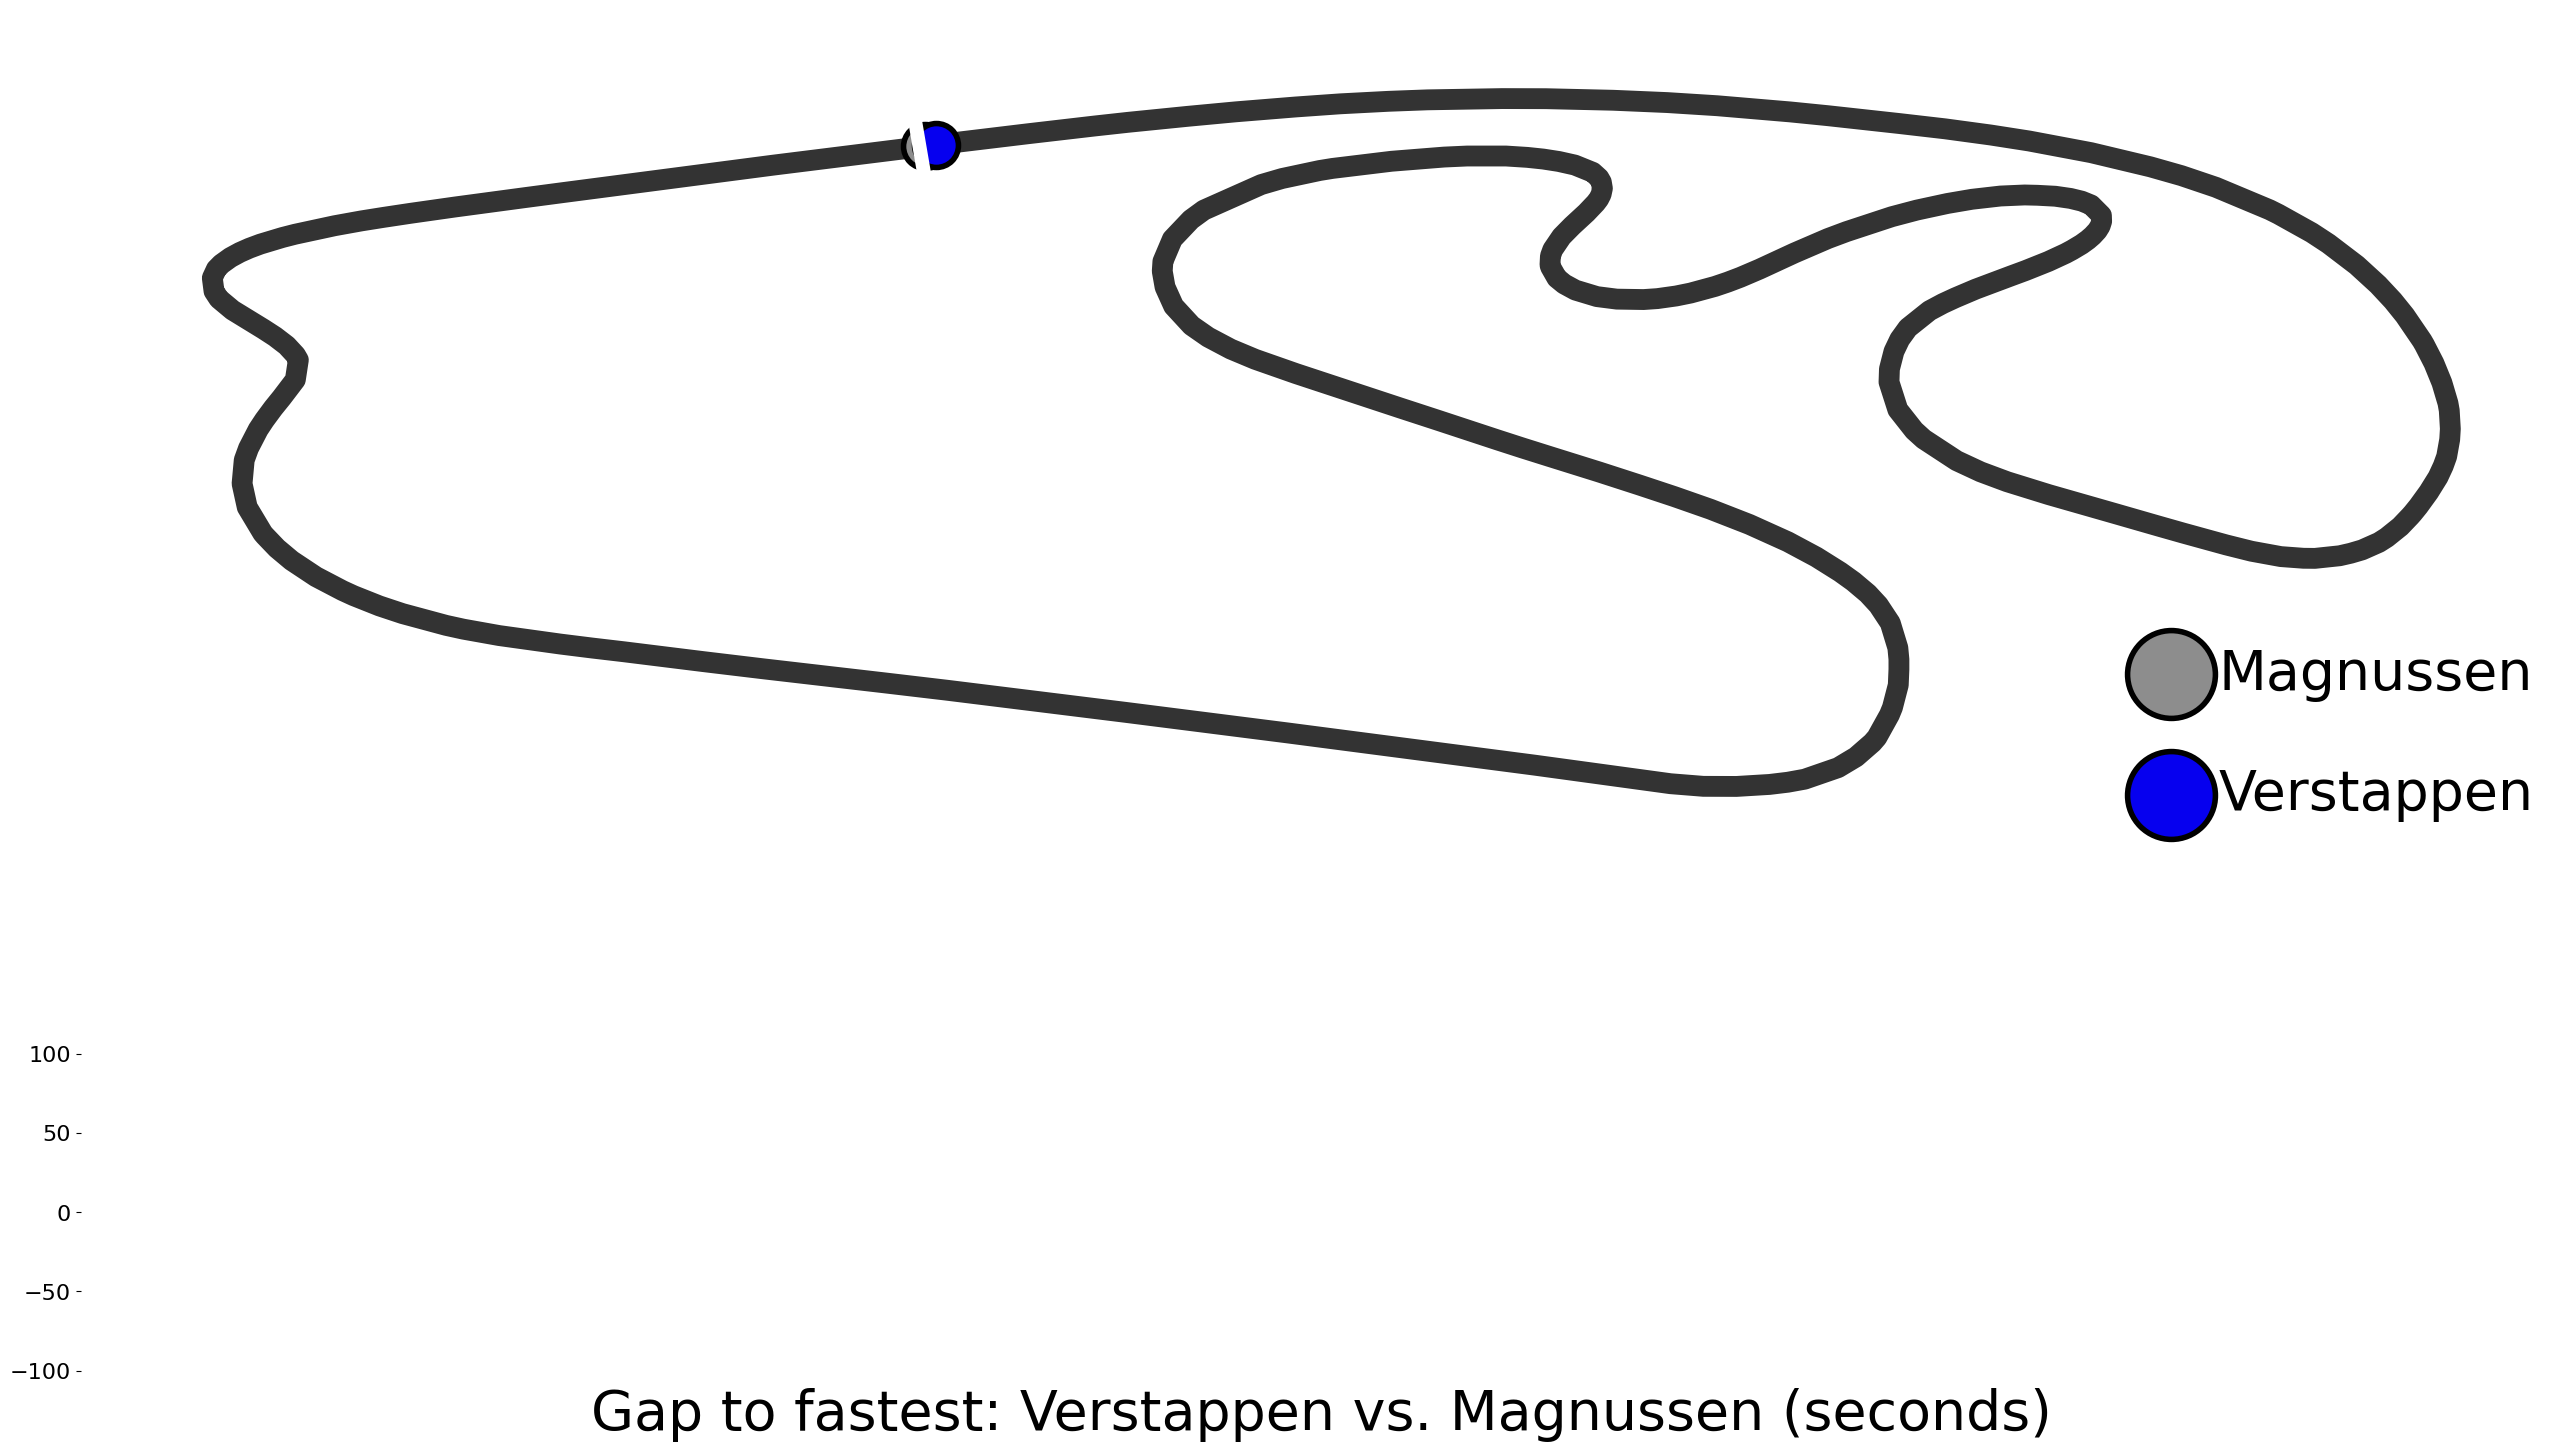

In [118]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_plot(i, scat_mag, scat_ver, line_mag, line_ver):

    line_mag.set_data(range(i), mag_gaps[:i])
    line_ver.set_data(range(i), ver_gaps[:i])

    ax[1].fill_between(range(i), 0, mag_gaps[:i], facecolor='#8d8d8d')
    ax[1].fill_between(range(i), 0, ver_gaps[:i], facecolor='#0600EF')


    plot_x_mag = ani_lap_mag_pos["X"][i]
    plot_y_mag = ani_lap_mag_pos["Y"][i]
    scat_mag.set_offsets((plot_y_mag, -plot_x_mag))


    plot_x_ver = ani_lap_ver_pos["X"][i]
    plot_y_ver = ani_lap_ver_pos["Y"][i]
    scat_ver.set_offsets((plot_y_ver, -plot_x_ver))
    
    return scat_mag, scat_ver, line_mag, line_ver

numframes = len(best_lap_mag_pos)


plot_x_mag = ani_lap_mag_pos["X"][0]
plot_y_mag = ani_lap_mag_pos["Y"][0]


plot_x_ver = ani_lap_ver_pos["X"][0]
plot_y_ver = ani_lap_ver_pos["Y"][0]

data = range(numframes)


line_x = ani_lap_mag_pos["X"][0]
line_y = ani_lap_mag_pos["Y"][0]

race_line_x = list(ani_lap_mag_pos["X"])
race_line_y = list(ani_lap_mag_pos["Y"])

race_line_x.append(race_line_x[0])
race_line_y.append(race_line_y[0])



fig, ax = plt.subplots(2,1, figsize=(32,18), gridspec_kw={'height_ratios': [2, 1]})

ax[0].plot(pd.DataFrame(race_line_y), -pd.DataFrame(race_line_x), label='MAG', c="black", linewidth=15, alpha=0.8, zorder = 0)
ax[0].plot([line_y, line_y- 50], [-line_x - 300, -line_x + 300], c = "white", linewidth=10)

speed_line_mag = ax[1].plot(range(0), [0 for _ in range(0)], c="#8d8d8d", linewidth=3)
speed_line_ver = ax[1].plot(range(0), [0 for _ in range(0)], c="#0600EF", linewidth=3)

scat_mag = ax[0].scatter(plot_y_mag, -plot_x_mag, c="#8d8d8d", s=1000, linewidths=4, edgecolors='black')
scat_ver = ax[0].scatter(plot_y_ver, -plot_x_ver, c="#0600EF", s=1000, linewidths=4, edgecolors='black')


ax[0].legend([scat_mag, scat_ver], ["Magnussen", "Verstappen"], fontsize = 40, frameon=False, markerscale=2, handlelength=.1, borderpad=0, labelspacing=1.2, loc='lower right')
ax[0].set_xlim([-6000, 5500])
ax[0].set_ylim([-2500, 5500])
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].set_xlim([0, numframes])

ax[1].set_ylim([min(gaps) - .2, max(gaps) + .2])

ax[1].xaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_title("Gap to fastest: Verstappen vs. Magnussen (seconds)", fontsize = 40, y=-0.1)
ax[1].yaxis.set_tick_params(labelsize=16)

ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                fargs=[scat_mag, scat_ver, speed_line_mag[0], speed_line_ver[0]], blit = False, interval=500, repeat=True)


plt.show()
# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=20,
#                                 metadata=dict(artist='Sebastian'))
# ani.save('./figures/lap_animation.gif', writer=writer)

# to save the animation using FFMpegWritter as a mp4
writervideo = animation.FFMpegWriter(fps=20) # brew install ffmpeg (if not working)
ani.save('./figures/lap_animation.mp4', writer=writervideo)


